# Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

1. Importing Libraries:


NumPy (np): A library for numerical operations in Python.
    
Pandas (pd): Used for data manipulation and analysis.
    
Matplotlib (plt): A plotting library for creating static, interactive, and animated visualizations in Python.
    
Seaborn (sb): Built on top of Matplotlib, Seaborn provides an interface for drawing attractive and 
informative statistical graphics.


2. Importing Machine Learning Libraries:


train_test_split: Splits the dataset into training and testing sets.
    
StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
    
metrics: Various metrics for evaluating model performance.
    
SVC (Support Vector Classifier): Implements Support Vector Machine for classification.
    
XGBClassifier: XGBoost classifier, an implementation of gradient-boosted decision trees.
    
LogisticRegression: Implements logistic regression for classification.
    
RandomOverSampler: Oversamples the minority class to address class imbalance.
    
    
3. Suppressing Warnings:


The warnings library is used to handle warnings in Python.

filterwarnings('ignore') suppresses warning messages. This can be useful to reduce console output clutter.

# Reading the Dataset:

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


a Pandas DataFrame (`df`) is created by reading a CSV file named 'weatherAUS.csv,'
and the first 10 rows of the DataFrame are displayed using the `head()` method.

In [3]:
df.shape

(145460, 23)

#The `df.shape` command returns a tuple representing the dimensions of the Pandas DataFrame `df`,
#where the first element is the number of rows and the second element is the number of columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

The `df.info()` command provides concise information about the Pandas DataFrame `df`,
including the data types of each column, the number of non-null values, and memory usage.

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


The `df.describe()` command generates descriptive statistics for the Pandas DataFrame `df`,presenting information
such as the count, mean, standard deviation, minimum, and quartiles for each numerical column in the dataset.
Note that parentheses should be added for the method to execute successfully: `df.describe()`.

In [6]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In these lines of code, specific columns ("Evaporation," "Sunshine," "Cloud9am," "Cloud3pm," "Location," and "Date") are dropped 
from the Pandas DataFrame `df` along both rows (axis 0) and columns (axis 1),
and the resulting DataFrame is displayed with the remaining columns using the `head()` method.

In [7]:
df = df.dropna(axis = 0)
df.shape

(112925, 17)

In these lines of code, rows with any missing values (NaN) are dropped from the Pandas DataFrame `df` along the rows (axis 0).
The resulting shape of the DataFrame is then displayed using `df.shape`,
showing the number of rows and columns after removing the rows with missing values.

In [8]:
df.columns # showing the number of columns in the dataset 

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Preprocessing the data

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])

In this code snippet, the `LabelEncoder` from scikit-learn is used to encode categorical variables in the Pandas DataFrame
`df` into numerical format: The columns 'WindGustDir,' 'WindDir9am,' 'WindDir3pm,' 'RainToday,' and 'RainTomorrow' are transformedusing `fit_transform()` method of `LabelEncoder`.This transformation assigns a unique numerical label to each distinct category

In [10]:
x = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']

In these lines of code, the dataset is split into features (`x`) and the target variable (`y`):
    
`x` is created by dropping the column 'RainTomorrow' from the DataFrame `df` along the columns (axis 1),
representing the features used for prediction.

`y` is assigned the values from the 'RainTomorrow' column, representing the target variable to be predicted.

In [11]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


#The `x.head()` command displays the first few rows of the DataFrame `x`, showing the feature variables after the 'RainTomorrow'
#column has been dropped. This is useful for inspecting the structure and content of the feature set.

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

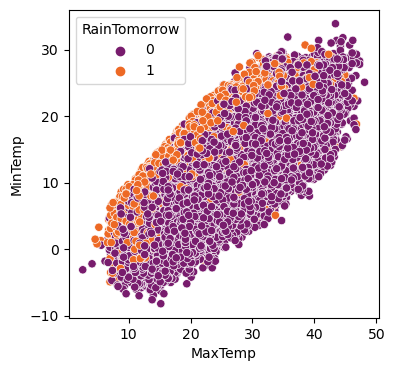

In [12]:
plt.figure(figsize = (4,4))
sb.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = df)

In this code, a scatter plot is created using Matplotlib and Seaborn:
- `plt.figure(figsize=(8, 8))`: Sets the size of the figure to be created.
- `sb.scatterplot(...)`: Creates a scatter plot using Seaborn.
  - `x='MaxTemp', y='MinTemp'`: Specifies the variables for the x and y axes.
  - `hue='RainTomorrow'`: Colors the points based on the 'RainTomorrow' column.
  - `palette='inferno'`: Sets the color palette for the plot.
 - `data=df`: Specifies the DataFrame from which to draw the data.

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

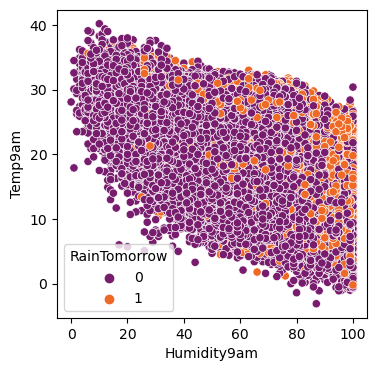

In [13]:
plt.figure(figsize = (4,4))
sb.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow' , palette = 'inferno',data = df)

This plot visualizes the relationship between 'Humidity9am' and 'Temp9am,' with points colored based on the 'RainTomorrow' variable, providing insight into how these weather features relate to the likelihood of rain tomorrow.

<Axes: >

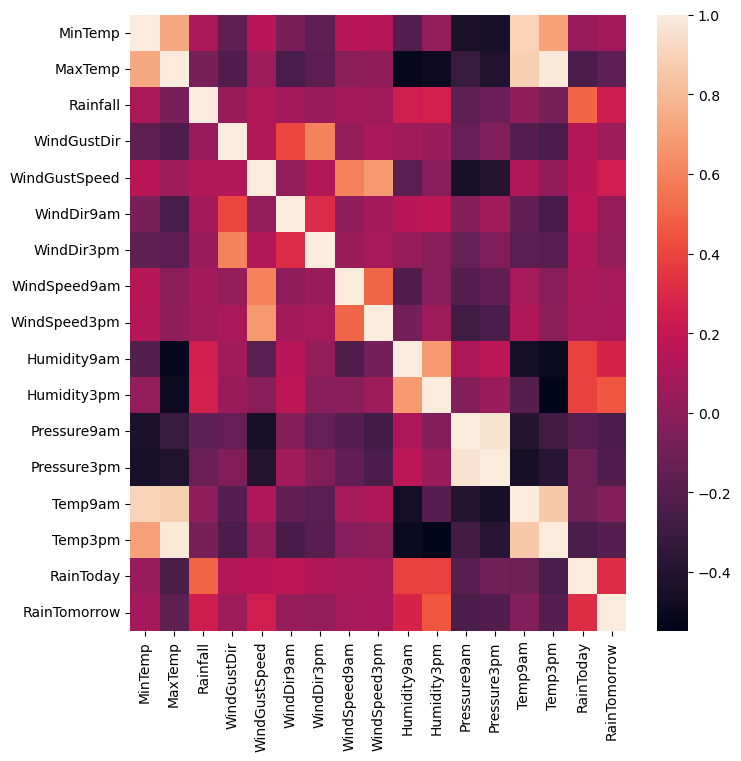

In [14]:
plt.figure(figsize = (8,8))
sb.heatmap(df.corr())

the above code provided is creates a heatmap using Seaborn to visualize the correlation matrix of the DataFrame df. Let's break down the code:

plt.figure(figsize=(8, 8))
sb.heatmap(df.corr())
plt.figure(figsize=(8, 8)): Sets the size of the figure to be created. The figsize parameter specifies the width and height of the figure in inches.

sb.heatmap(df.corr()): Generates a heatmap of the correlation matrix using Seaborn.

df.corr(): Computes the pairwise correlation of columns in the DataFrame, resulting in a correlation matrix.
sb.heatmap(...): Plots a heatmap of the correlation matrix, where colors represent the strength and direction of correlations between variables. Lighter colors typically indicate stronger correlations.
This visualization is useful for understanding the relationships between different numerical variables in the dataset. Each cell in the heatmap corresponds to the correlation coefficient between two variables, providing insights into how variables are associated with each other.




# Spliting the Dataset into Train and test Data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In this code, the dataset is split into training and testing sets using the `train_test_split` function from scikit-learn:
- `train_test_split(x, y, test_size=0.3)`: Splits the feature set `x` and target variable `y` into training and testing sets.
  - `x_train`, `x_test`: The feature sets for training and testing.
  - `y_train`, `y_test`: The corresponding target variables for training and testing.
  - `test_size=0.3`: Specifies that 30% of the data should be used for testing, while 70% is used for training. The exact ratio can be adjusted as needed.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In this code, scikit-learn's `metrics` module is imported to access functions for evaluating the performance of machine learning models:
- `classification_report`: Generates a text report showing the main classification metrics, including precision, recall, and F1-score, for each class.
- `confusion_matrix`: Computes a confusion matrix to evaluate the accuracy of a classification.
- `accuracy_score`: Calculates the accuracy of the classification.
    
These functions will be useful for assessing the performance of a machine learning model, particularly in a classification task.

# Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[25073  1263]
 [ 3920  3622]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     26336
           1       0.74      0.48      0.58      7542

    accuracy                           0.85     33878
   macro avg       0.80      0.72      0.74     33878
weighted avg       0.84      0.85      0.83     33878

0.8470098589054844


# Decision tree Classifier 

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[22597  3739]
 [ 3422  4120]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     26336
           1       0.52      0.55      0.54      7542

    accuracy                           0.79     33878
   macro avg       0.70      0.70      0.70     33878
weighted avg       0.79      0.79      0.79     33878

0.7886238857075388


# Random Forest working

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

[[25099  1237]
 [ 3635  3907]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26336
           1       0.76      0.52      0.62      7542

    accuracy                           0.86     33878
   macro avg       0.82      0.74      0.76     33878
weighted avg       0.85      0.86      0.85     33878

0.8561898577247772


# XGBoost classifier working:

In [20]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
print('acc',accuracy_score(y_test,pred))
print('f1',classification_report(y_test,pred))
print('matrix',confusion_matrix(y_test,pred))

acc 0.8550977035244112
f1               precision    recall  f1-score   support

           0       0.88      0.94      0.91     26336
           1       0.74      0.55      0.63      7542

    accuracy                           0.86     33878
   macro avg       0.81      0.74      0.77     33878
weighted avg       0.85      0.86      0.85     33878

matrix [[24853  1483]
 [ 3426  4116]]


In [23]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','decision', 'random','Xgboost'],
    'Score': [0.8470,0.7886,0.8561,0.8550]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.8561,random
0.8550,Xgboost
0.8470,Logistic Regression
0.7886,decision


# conclusion

The overall aim is to define various ML techniques that are useful in predicting rainfall. The goal of this research is to design

accurate and efficient model by applying lesser number of attributes and tests. Firstly, the data is pre-processed and then it is used in the model. Random Forest classifier with approximately 85.34% are the most efficient classification algorithms. However, Decision Tree classifier gives the least accuracy with 78%. We can further expand this research covering
other ML techniques such as time series, clustering and association rules and other ensemble techniques. Taking into consideration

the limitations of this study, there is a need to build more complex and combination of models to get higher accuracy for rainfall
prediction system. Study can also be formulated using greater articulate monitoring for particular area and create this kind of model
for enormous dataset so that calculation rate can be increased with better precision and with more accuracy.